# Assignment 02

First, set the coefficient matrix A and the variable vector x. You may use an off-the-shelf random number generator function to create A and x matrices.

In [1]:
import numpy as np

In [2]:
A = np.random.randint(10, size=(3, 3))
A

array([[3, 1, 3],
       [9, 0, 7],
       [7, 4, 5]])

In [3]:
x = np.random.randint(10, size=3)
x 

array([9, 5, 1])

Using these two, obtain the outcome vector b such that Ax = b. 

In [4]:
b = np.dot(A, x)
b

array([35, 88, 88])

# a. Obtain the closed-form solution of Ax =b. Print the estimated solution, x. Test with both regular and pseudo-inverse of A.

### Closed-form solution


In [5]:
x_close_sol = np.dot(np.linalg.inv(A), b)

x_close_sol

array([9., 5., 1.])

### Pseudo-inverse solution

In [6]:
A_T = np.transpose(A)

A_T_times_A = np.dot(A_T, A)
A_T_times_b = np.dot(A_T, b)

x_pseudo_sol = np.dot(np.linalg.inv(A_T_times_A), A_T_times_b)
x_pseudo_sol

array([9., 5., 1.])

# b. Obtain the sum of squared error (goodness of the estimation) of this closed-form solution as follows. 𝐸 = ∑𝑛 ( 𝑥_𝑖 − 𝑥 ̂_𝑖)^2, where n is the total number of elements in the solution vector, x


In [7]:
closed_sol_sq_err = sum(x - x_close_sol) ** 2
closed_sol_sq_err

2.8398992587956425e-29

In [8]:
pseudo_sol_sq_err = sum(x - x_pseudo_sol) ** 2
pseudo_sol_sq_err

4.245964936261574e-26

# c. Implement the gradient descent optimization algorithm to solve for x such that it minimizes ‖ 𝐴𝑥 − 𝑏 ‖ 2 , where ||. || 2 is the two norm. You need to update the solution for x iteratively taking the slope of the error into consideration.

In [12]:
n = 3

def gradient_descent(A,b,x0):
    step_size = 0.00001
        
    new_x = np.array([1, 1, 1])
    
    iteration = 0
    max_iters = 5000
    alpha = 0.002
    
    e_str = []
    it_str = [0]
    
    while iteration <= max_iters:
        
        
        old_x = new_x
        e = (np.dot(A, old_x) - np.transpose(b))
        new_x = old_x - alpha * 2 * np.dot(e, A)

        e_str.append(e)
        
        step = new_x - old_x

        
        if (abs(step) <= step_size).all():
            break

        iteration += 1
    
        it_str.append(iteration)
    
    return new_x, e_str, it_str

In [13]:
x0 = 1
x_final, e_str, itr = gradient_descent(A, b, x0)

In [441]:
e_str

[array([-56, -41, -23]),
 array([ 3.892, 14.916,  1.896]),
 array([-6.756512,  4.739264, -2.485856]),
 array([-4.74813965,  6.42521306, -1.61822822]),
 array([-5.01196376,  5.98535071, -1.69652027]),
 array([-4.8691151 ,  5.92972284, -1.60880506]),
 array([-4.80031564,  5.80785698, -1.55440504]),
 array([-4.71932323,  5.70052219, -1.49736188]),
 array([-4.64162991,  5.59316286, -1.44394727]),
 array([-4.56446998,  5.48833055, -1.39286536]),
 array([-4.48835164,  5.38550893, -1.34418795]),
 array([-4.41319353,  5.284734  , -1.29775054]),
 array([-4.3390181 ,  5.18594433, -1.25343965]),
 array([-4.26582736,  5.08909765, -1.21114074]),
 array([-4.19362529,  4.99414982, -1.17074712]),
 array([-4.12241397,  4.90105854, -1.13215785]),
 array([-4.05219434,  4.80978266, -1.09527777]),
 array([-3.98296623,  4.7202822 , -1.06001707]),
 array([-3.91472839,  4.6325183 , -1.026291  ]),
 array([-3.84747865,  4.54645322, -0.99401956]),
 array([-3.78121393,  4.46205022, -0.96312726]),
 array([-3.71593

In [384]:
np.dot(A, x)

array([77, 60, 31])

In [16]:
x_final

array([8.99422051, 5.0006911 , 1.00728922])

In [445]:
np.dot(A, x_final) - b

array([-0.00942767,  0.01077673, -0.0016146 ])

# d. Plot a figure showing the sum of squared error (this is an unsupervised error, (e = Ax - b) versus the iteration number. Based on this figure state the number of iterations required to reach the minimum error point. Print the estimated solution, x.

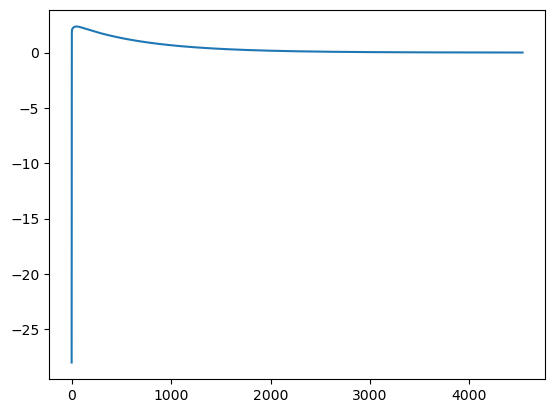

In [14]:
import matplotlib.pyplot as plt
e_str = np.array(e_str)

plt.plot(itr, e_str[:,0])

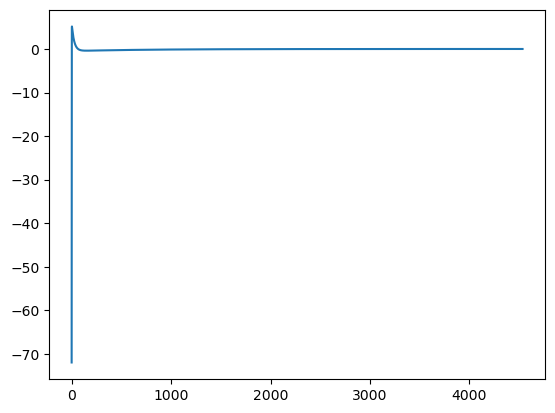

In [15]:
plt.plot(itr, e_str[:,1])

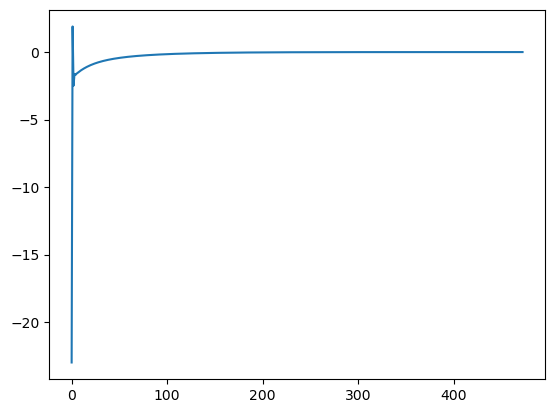

In [487]:
plt.plot(itr, e_str[:,2])

# e. Show the sum squared error (goodness of the estimation as shown in part b), E for the final estimated x using the gradient descent algorithm.


In [17]:
grad_desc_err = sum(e_str[-1])

grad_desc_err

0.002987591897813502

# f. Compare the E values obtained using 1) the closed-form solution and 2) gradient descent algorithm.

In [18]:

print("Closed-form error: ", closed_sol_sq_err)
print("Gradient-descent error: ", grad_desc_err)

Closed-form error:  2.8398992587956425e-29
Gradient-descent error:  0.002987591897813502
